# **IMAGE ANALYSIS**
## **Practice 7.** Back Propagation.
#### Created by: Bryan Israel Blancas Pérez.
##### ID: 201663003
##### Group: 3CV7

## Back Propagation
In machine learning, specifically deep learning, backpropagation is an algorithm widely used in the training of feedforward neural networks for supervised learning.

The backpropagation algorithm works by computing the gradient of the loss function with respect to each weight by the chain rule, iterating backwards one layer at a time from the last layer to avoid redundant calculations of intermediate terms in the chain rules.

<img src="https://www.guru99.com/images/1/030819_0937_BackPropaga1.png" alt="Fashion MNIST sprite"  width="600">

The algorithm tries to find out if two classes are linearly separable

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1280px-Kernel_Machine.svg.png" alt="Fashion MNIST sprite"  width="600">

### Perceptron
Perceptrons can be viewed as building blocks in a single layer in a neural network, made up of four different parts:

<ol>
  <li>Input Values or One Input Layer</li>
  <li>Weights and Bias</li>
  <li>Net sum</li>
  <li>Activation function</li>
</ol>

A neural network is an interconnected system of perceptrons, so it is safe to say perceptrons are the foundation of any neural network.

<img src="http://blog.josemarianoalvarez.com/wp-content/uploads/2018/06/ModeloPerceptron-768x444.jpeg" alt="Fashion MNIST sprite"  width="600">

#### Basic behaviour

<ol>
  <li>All the inputs x are multiplied with their weights w. Let’s call it k.</li>
  <li>Add all the multiplied values and call them Weighted Sum. 
  
  <img src="https://miro.medium.com/max/475/1*xFd9VQnUM1H0kiCENsoYxg.gif" alt="Fashion MNIST sprite"  width="600"></li>
  <li>Apply that weighted sum to the correct Activation Function.

  <img src="https://miro.medium.com/max/432/1*0iOzeMS3s-3LTU9hYH9ryg.png" alt="Fashion MNIST sprite"  width="600"></li>
  <li>Output will be in this step.</li>
</ol>

### Back Propagation algorithm 

<ol>
  <li>Define a neural network model. That means the input layer, hidden layers and output layer.</li>
  <li>Forward propagation and evaluation. where the final step in a forward pass is to evaluate the predicted output against an expected output. Evaluation between s and y happens through a cost function.</li>
  <li>Backpropagation and computing gradients. The aim is minimize the cost function by adjusting network’s weights and biases. The level of adjustment is determined by the gradients of the cost function with respect to those parameters.</li>
</ol>


## Code

#### 1. Import tensorflow, keras and numpy

In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version: "+tf.__version__)

TensorFlow 2.x selected.
TensorFlow version: 2.0.0


#### 2. Load dataset

In [3]:
cifar10_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10_dataset.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
print("Train images shape: "+str(train_images.shape))
print("Test images shape: "+str(test_images.shape))

Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


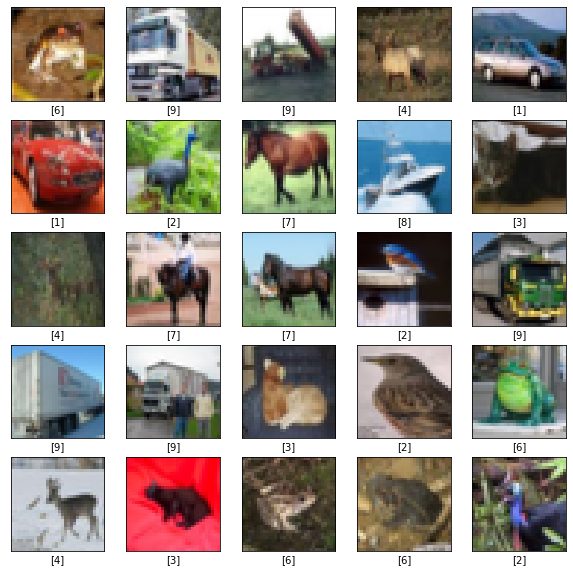

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


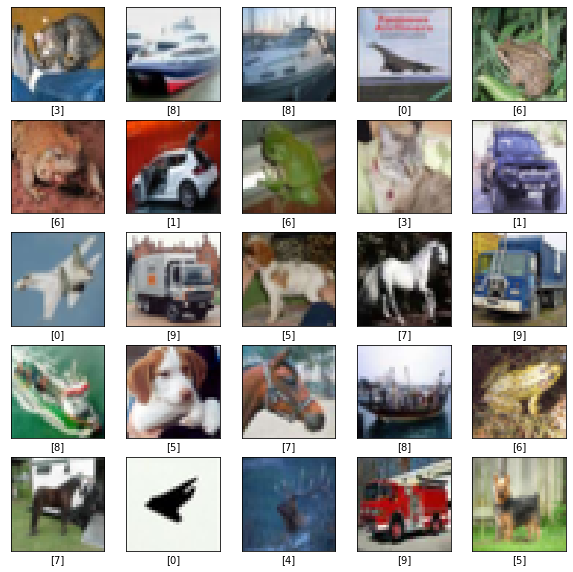

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(test_labels[i])
plt.show()

#### 3. Pre-processing dataset

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


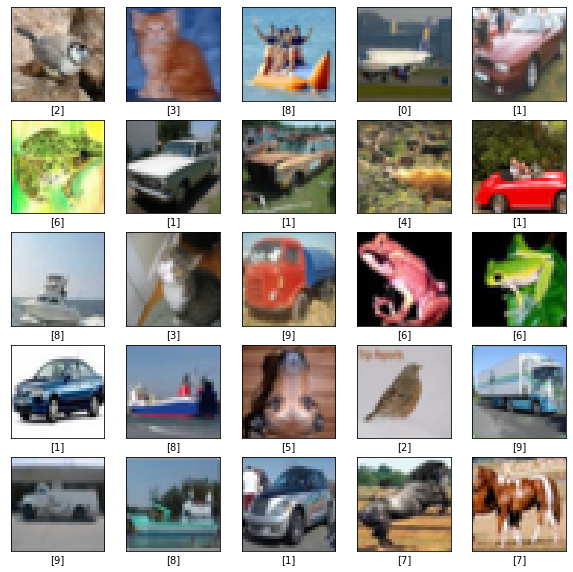

In [8]:
plt.figure(figsize=(10,10))
for i in range(90,115):
    plt.subplot(5,5,i-89)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### 4. Create and train neural network


In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(256, activation='sigmoid'), 
    keras.layers.Dense(512, activation='sigmoid'), 
    keras.layers.Dense(10, activation='softmax')
])

# 2 sigmod = 70

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=50, batch_size=128)

Train on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 170us/sample - loss: 2.0262 - accuracy: 0.2552
Epoch 2/50
50000/50000 [==============================] - 8s 156us/sample - loss: 1.8033 - accuracy: 0.3470
Epoch 3/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.7034 - accuracy: 0.3884
Epoch 4/50
50000/50000 [==============================] - 8s 156us/sample - loss: 1.6296 - accuracy: 0.4162
Epoch 5/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.5748 - accuracy: 0.4372
Epoch 6/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.5338 - accuracy: 0.4502
Epoch 7/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.4977 - accuracy: 0.4665
Epoch 8/50
50000/50000 [==============================] - 8s 156us/sample - loss: 1.4663 - accuracy: 0.4741
Epoch 9/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.4371 - accuracy: 0.4854
Epoch

#### 5. Test Neural Network

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Conclusions

In this practice I have learnt something new, I mean Neural Networks is a completely new concept for me.

This practice was about to train a neural neuwork with a public image dataset. I chose CIFAR10 which is a dataset with 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images. The aim was categorized each one of them correctly by a trained neural network.

I chose a model with 3 hidden layers, the first two layers with 256 size and the last one with 512. Doing 50 epochs, I was able to reach up to 65% of accuracy meanwhile with the test images the percentage of accuracy was 44%.

I have already realized that desing and train a neural network is not a trivial work, it is so difficult but, at the same time, kind of exciting work.